In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [2]:
df = pd.read_csv('Height-Weight Data.csv')

In [3]:
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3501 entries, 0 to 3500
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Height  3501 non-null   float64
 1   Weight  3501 non-null   float64
dtypes: float64(2)
memory usage: 54.8 KB


In [5]:
df.isnull().sum()

Height    0
Weight    0
dtype: int64

In [6]:
df.describe()

,Height,Weight
count,3501.000000,3501.000000
mean,69.024411,186.891258
std,2.858583,19.903132
min,59.380650,65.780000
25%,67.193523,173.896237
50%,69.044211,187.308370
75%,70.976491,200.356448
max,78.998742,269.989698


Text(0.5, 1.0, 'Weight of human')

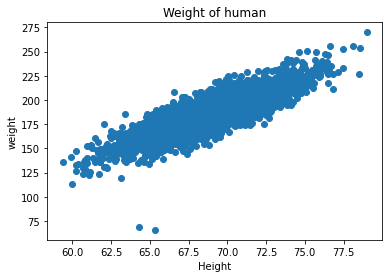

In [9]:
plt.scatter(df.Height, df.Weight)
plt.xlabel('Height')
plt.ylabel('weight')
plt.title('Weight of human')

Text(0.5, 1.0, 'Weight of human')

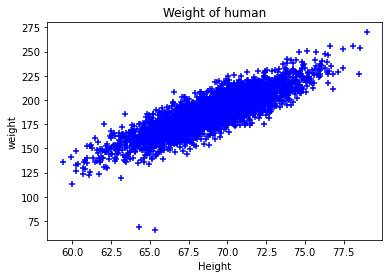

In [11]:
plt.scatter(df.Height , df.Weight, c ="blue",marker='+') 
plt.xlabel('Height')
plt.ylabel('weight')
plt.title('Weight of human')

In [12]:
df.Height.mean()

69.02441087268797

In [13]:
df.Weight.mean()

186.89125797946284

In [14]:
x = df[['Height']] 
y = df['Weight']

In [15]:
x.shape

(3501, 1)

In [54]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size=.70,random_state=1) 

ValueError: Found input variables with inconsistent numbers of samples: [3501, 1]

In [55]:
xtest.shape

(1051, 1)

In [56]:
from sklearn.linear_model import LinearRegression 

In [57]:
lr = LinearRegression()

In [58]:
lr.fit(xtrain, ytrain)

LinearRegression()

In [59]:
m=lr.coef_

In [22]:
c=lr.intercept_
c

-225.82603000755844

In [23]:
x1 = 68.781904
y = m*x1 + c

In [24]:
y

array([185.31432503])

In [25]:
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [26]:
lr.predict([[68.781904]])

array([185.31432503])

In [27]:
df['Predicted weight'] = lr.predict(x)

In [28]:
df.head(10)

,Height,Weight,Predicted weight
0,73.847017,241.893563,215.590782
1,68.781904,162.310473,185.314325
2,74.110105,212.740856,217.163380
3,71.730978,220.042470,202.942268
4,69.881796,206.349801,191.888873
5,67.253016,152.212156,176.175472
6,68.785081,183.927889,185.333317
7,68.348516,167.971111,182.723767
8,67.018950,175.929440,174.776355
9,63.456494,156.399676,153.481956


In [47]:
#Accuracy Check
lr.score(xtest , ytest)

0.7313258168853622

In [48]:
#Accuracy Check
lr.score(xtrain , ytrain)

0.7327243206606744

In [31]:
from sklearn.metrics import mean_squared_error

In [50]:
#MSE
mse = mean_squared_error(df.Weight, df['Predicted weight'] )

In [34]:
mse

106.01097113124197

In [42]:
pred = lr.predict(xtest)
pred

array([177.07092663, 189.9655512 , 167.54939263, ..., 209.55755027,
       178.6987462 , 204.84854541])

In [43]:
mse = mean_squared_error(ytest, pred)
mse

110.89221516932378

In [35]:
pred2 = lr.predict(xtrain)
pred2

array([173.38945227, 163.86100911, 182.97238866, ..., 228.45987235,
       195.91437382, 194.20551648])

In [36]:
mse = mean_squared_error(ytrain, pred2)
mse

103.91701705613012

In [51]:
#MAE
from sklearn.metrics import mean_absolute_error
mean_absolute_error(df.Weight, df['Predicted weight'])

8.070522808716397

Text(0.5, 1.0, 'Weight of human')

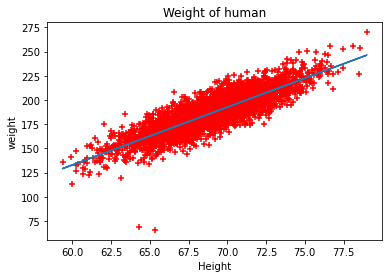

In [44]:
plt.plot(df.Height , lr.predict(x))
plt.scatter(df.Height , df.Weight, c ="red",marker='+')
plt.xlabel('Height')
plt.ylabel('weight')
plt.title('Weight of human')

In [39]:
df.Height.mean()

69.02441087268797

In [41]:
df.Weight.mean()

186.89125797946284